In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
# Step 1: Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [38]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
# Step 2: Basic EDA
print("Dataset Overview:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe(include='all'))

Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Summary Statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          150.000000        150.000000         150.000000   
unique                NaN               NaN                NaN   
top                   NaN               NaN                NaN   
freq                  NaN               NaN                NaN   
mean             5.843333          3.057333           3.758000   
std              0

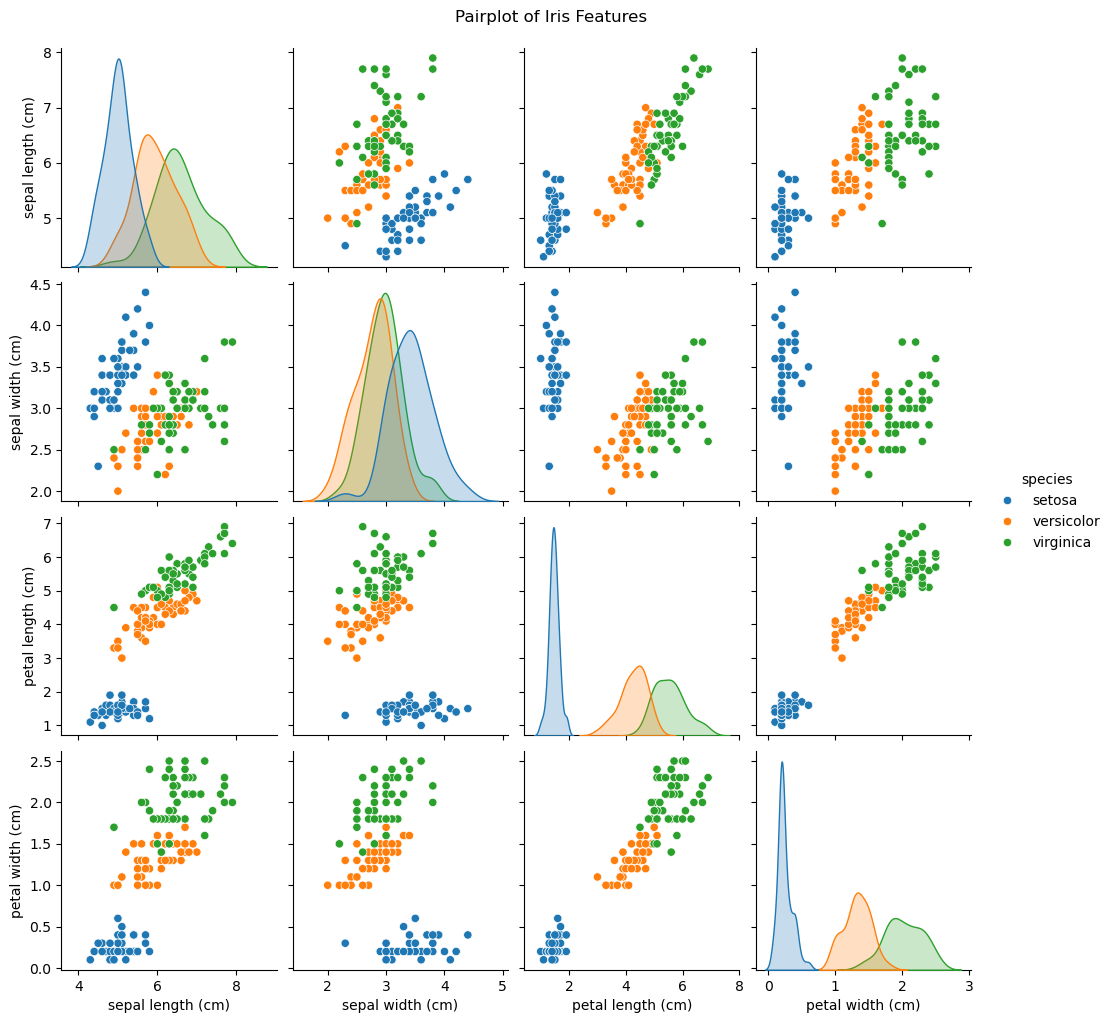

In [8]:
# Plotting pairplot for visualization
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

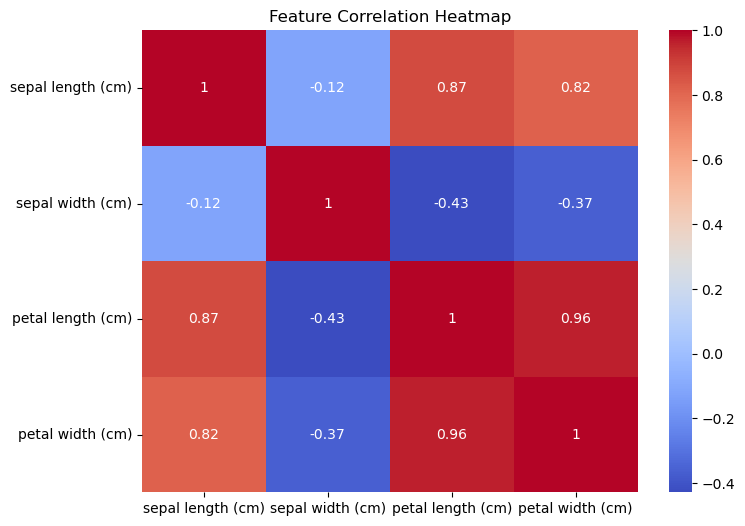

In [32]:
# Heatmap of correlations (excluding the categorical 'species' column)
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [48]:
# Step 3: Splitting data into features and target
X = df.drop('species', axis=1)
y = df['species']

In [50]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [16]:
# Step 5: Data Preprocessing (Scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Step 6: Train the KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Step 7: Evaluate the Model
y_pred = knn.predict(X_test)


Confusion Matrix:


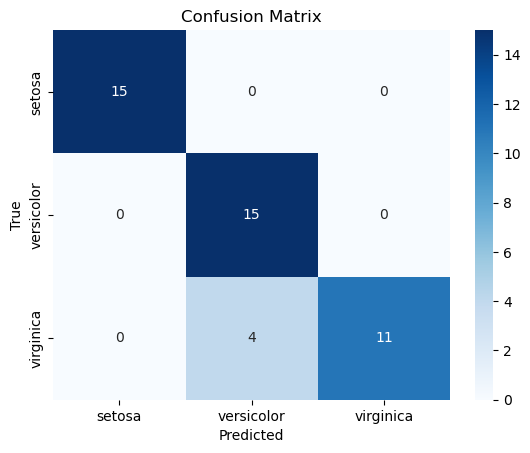

In [22]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [24]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45

